# Causal Inference Modelling

#### Rishane Dassanayake

## Table of Contents

- [Introduction](#introduction)
- [Section 0: Basic Setup](#basic_setup)
- [Section 1: Model Fitting](#model_fitting)
- [Section 2: Model Interpretation](#model_interpretation)
    - [Average Treatment Effect (ATE)](#ate)
    - [Feature Importances](#feature_importances)
    - [CATE Interpreter](#cate_interpreter)
- [Section 3: Model Evaluation](#model_evaluation)
- [Conclusions](#conclusions)
- [Appendix](#appendix)

## Introduction <a id="introduction"></a>

This notebook contains the causal inference modelling components of my Capstone project for the BrainStation Data Science bootcamp. 

### Research Question

This project is aimed at answering the question: **'How might we use machine learning to understand the role of social pressure in influencing voting behaviour?'.** We can decompose this question further into 3 sub-questions: 

1. **Does social pressure influence voting behaviour in terms of changing voting rates?**
2. **If so, by how much?**
3. **For whom, in particular?**

### Data

The dataset I have used comes from a paper published in 2008 by Donald P. Green, Alan S. Gerber and Christopher W. Larimer called "Social Pressure and Voter Turnout: Evidence from a Large-Scale Field Experiment". The paper contains a sample size of 344,084 individuals (registered voters) and 180,002 households in the U.S. state of Michigan. 

The paper reports results of a field experiment whereby the experimenters sent mail to households that were randomly assigned to one of 4 treatment group. Each treatment group received mail containing one of 4 different prompts with each prompt escalating in the degree of social pressure they exert on the recipient to vote in the upcoming 2006 Michigan Primary Election. The paper then measures whether each individual voted in the election. The dataset also contains data on each individual's previous voting behaviour and census data from the United States Census Bureau that describes demographic, employment and educational information for each ZIP code studied in the paper. 

I have included a data dictionary in the [appendix](#appendix).

> The aim of this project is to use machine learning to identify the effect of each of the treatments on voting behaviour and find subgroups in the population that responded particularly strongly to the treatments.

Follow [this link](https://drive.google.com/drive/folders/1UqjmiWH4Zvxt3b-Ve2yyaAsAzuwhuxI4?usp=sharing) to access all the datasets used in this project. 

### Recap

So far in our modelling process, we have managed to clean the data, perform some basic and advanced EDA, pre-process the data, perform some feature engineering and run a variety of machine learning models to attempt to answer our research question(s). Here is an overview of the performance of our models so far: 

| Model Name           | Accuracy | Precision* | Recall* | F1 Score* |
|----------------------|----------|-----------|--------|----------|
| LogReg: SMOTE        | 0.57 | 0.37 |0.50| 0.43 |
| LogReg: GridSearchCV | 0.70 | 0.57 |0.19| 0.28 |
| DT: Tuned            | 0.70 | 0.57 |0.21| 0.31 |
| RF: First Pass       |     0.70     |      0.53     |    0.37    |      0.43    |
| RF: Class Balance    |     0.60     |     0.42      |     0.68   |      0.52    |
| Gradient Boosting    |     0.71     |      0.59     |    0.29    |     0.39     |
| Neural Network       |     0.71     |     0.60      |   0.27     |     0.36     |

\*These are all evaluation metrics for Class 1 (voted). 

### Problems so far

However, we do not yet have satisfactory answers to any of our sub-questions. 

**Q1. Does social pressure influence voting behaviour in terms of changing voting rates?**

*A: We are unsure because of a lack of consensus amongst our machine learning models about whether the treatments are important in predicting whether or not someone votes.* 

Our models so far tend to identify past voting behaviour and age as being important features in predicting whether or not someone votes. This is useful information. However, it doesn't help us examine the effect of our treatment (social pressure) on our target (voting). Some models deem the treatment useful (e.g. RF: Class Balance), whereas others do not (e.g. DT: Tuned) and others consider our treatment to have a negative effect on voting (e.g. LogReg: SMOTE). Since we do not have a single model that outperforms others in terms of both accuracy and F1 score, the lack of consensus between models gives us very little evidence to answer our question of interest. 

**Q2: If so, by how much?** 

*A: We are unsure because feature importance is not interpretable as a causal magnitude of a treatment effect.* 

Even if we had consensus amongst our models about whether social pressure impacted voting, logistic regression is the only model that had outputs that were interpretable in concrete probability terms (i.e. "the presence of a treatment had a X% impact on the odds ratio of an individual voting"). Other models had outputs in terms of feature importances which just tells us how useful a feature was in determining a correct prediction. Furthermore, we cannot interpret any of these model outputs as being causal treatment effects. This is because the machine learning models used so far are not structured to provide interpretable coefficients that can be directly understood as the effect of a one-unit change in the treatment variable on the outcome (target) variable. 

**Q3: For whom, in particular?**

*A: We have no information about the heterogeneity of treatment effects.*

Even if we could confidently identify the presence and magnitude of our treatment effect, our machine learning models cannot pick out well-defined subgroups in our population that may be more or less responsive to social pressure. This is because our models (if we assumed they were causally interpretable) would only identify an 'average treatment effect' - the effect of social pressure on voting averaged over the entire population. This may mask some of the heterogeneity in our treatment effect. Some groups of people may be very responsive to social pressure, whereas others may actively vote less when socially pressured. If we average these effects over our entire population, we would observe a negligible average treatment effect! However, this masks important information about which groups we may want to target to increase voting rates and which groups to avoid. 

### A solution: Causal Forests

To address the issues highlighted above and to advance from mere prediction to causal inference, we can employ machine learning methods optimized for causal inference, such as a causal forest model. Causal forests are an extension of random forests that are specifically designed to estimate causal effects, particularly the **conditional average treatment effect (CATE)**.

Causal forests differ from traditional machine learning models in several key ways that make them suitable for causal inference:

1. **Heterogeneity in Treatment Effects**: Causal forests can identify variations in treatment effects across different subpopulations. This is achieved by partitioning the data into subgroups where the treatment effect is relatively homogenous within groups but varies between them. It allows us to answer not just whether social pressure influences voting behavior, but for whom it is most effective.

2. **Counterfactual Estimation**: Causal forests are built upon the potential outcomes framework, which considers the counterfactual outcomes — what would have happened to the same individual both with and without the treatment. By leveraging this framework, causal forests can provide a more nuanced view of the treatment effect that traditional machine learning models cannot.

3. **Unbiased Estimation**: They apply techniques such as honest splitting, where one part of the data is used to create the split and another to estimate the treatment effect within leaves, to reduce overfitting and bias in the estimation of treatment effects.

4. **Incorporating Causal Assumptions**: Causal forests can incorporate propensity scores, covariate balancing, and other adjustments to account for confounding variables, ensuring that the estimated treatment effects are not due to spurious correlations.

5. **Interpretability and Policy Insights**: With causal forests, it's possible to not only estimate treatment effects but also to generate interpretable rules for targeting interventions. This leads to the formulation of data-driven policies that can focus on specific groups predicted to benefit most from the treatment.

### Structure

This notebook is structured into three main sections. Section 1 deals with model fitting, Section 2 deals with model interpretation and Section 3 deals with model evaluation. 

### References

Gerber, Alan S., Donald P. Green, and Christopher W. Larimer, 2008, Replication Materials for “Social Pressure and Voter Turnout: Evidence from a Large-Scale Field Experiment.” http://hdl.handle.net/10079/c7507a0d-097a-4689-873a-7424564dfc82. ISPS Data Archive.

Census Data Source: https://data.census.gov/all?g=040XX00US26&y=2011

EconML Package: https://github.com/py-why/EconML?tab=readme-ov-file

## Section 0: Basic Setup <a id="basic_setup"></a>

In [1]:
# importing libraries
import sys
sys.path.append('../utils/')
import capstone_utils as u

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import econml
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# show all dataframe columns

pd.set_option('display.max_columns', None)

In [132]:
# import split data
train_features = pd.read_csv('~/Desktop/cap_data/social_collapsed_train.csv', index_col=0)
test_features = pd.read_csv('~/Desktop/cap_data/social_collapsed_test.csv', index_col=0)
y_train = pd.read_csv('~/Desktop/cap_data/social_y_train.csv', index_col=0)
y_test = pd.read_csv('~/Desktop/cap_data/social_y_test.csv', index_col=0)

## Section 1: Model Fitting <a id="model_fitting"></a>

To sufficiently answer our three questions, I have chosen to use the CausalForestDML model from the EconML package. Our goal with using this model is to estimate the **Conditional Average Treatment Effect (CATE)** of social pressure on voting. This is the average difference between voting rates of treated and untreated individuals in our dataset, conditional on some profile of characteristic (i.e. our demographic and other features). More formally, we want to effectively estimate some quantity $\tau(x)$ (our CATE) which can be written as: 

$$\tau(x) = \mathbb{E}[Y_i^1 - Y_i^0 \ | \ X_i = x] = \mu_1(x) - \mu_0(x)$$

where $x$ is a n-dimensional matrix (for a characteristic profile with n covariates), $Y_i^1$ is the value of the outcome variable (did they vote or not) for people who received the treatment, and $Y_i^0$ is the value of the outcome variable for people who did not receive the treatment.

The causal forest algorithm, as used in this notebook, builds on the random forest algorithm to find subgroups in the population that respond to the treatment differently than others. Whereas random forest splits data in such a way that leaf nodes are homogenous within a single leaf node and as different as possible to the other leaf node in the same split *in terms of the value of the outcome variable*, the causal forest algorithm performs this split according to *how much individuals in each node respond to the treatment*. The effect of this is that we are left with leaf nodes that represent subgroups in our population, separated by how much they respond to the treatment. This allows us to answer all three of the subquestions mentioned in the [introduction](#introduction). 

See [Jones (2021), p.22-24](https://arxiv.org/pdf/2104.09935.pdf) for more details on how the Causal Forest algorithm works. 

We can begin by importing the libraries we need for running this model.

In [7]:
# import libraries
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestClassifier

#### Combine Treatments into One Column

I have decided to combine all 4 of my treatments (each of which correspond to mailings sent to treated individuals that exert different levels of social pressure) into one column. We are then left with one column - `treated` - instead of 4 different columns. This is because the difference between the level of social pressure exerted from one mailing to another is marginal. Since we are more concerned with the effect of exerting social pressure on voting as a whole and less concerned with which *kind* of social pressure creates the biggest difference, it makes more sense to collapse our 4 treatment columns into one. 

This collapsing step was performed earlier and I imported the collapsed dataset in Section 0 of this notebook. See the [appendix](#appendix) for the code used to perform this step. 

In [134]:
# separate treatment column 
T_train = train_features['treated'].reset_index(drop=True)
T_test = test_features['treated'].reset_index(drop=True)

In [135]:
# drop treated column from train and test
X_train = train_features.drop(columns=['treated']).reset_index(drop=True)
X_test = test_features.drop(columns=['treated']).reset_index(drop=True)

In [136]:
# flatten the y_train and y_test arrays
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

#### Initial Model Fitting

We can now instantiate and fit our model.

In [142]:
# instantiate causal forest model
cf = CausalForestDML(model_y=RandomForestClassifier(), # model used to predict outcome
                     model_t=RandomForestClassifier(), # model used to predict treatment
                     discrete_treatment=True, # specify that treatment is discrete
                     discrete_outcome=True, # specific that outcome is discrete
                     n_estimators=100, # set number of trees in causal forest 
                     min_samples_leaf=10, # set minimum number of samples required to be a leaf node
                     max_depth=None, # set maximum depth 
                     random_state=42)

# fit the model
cf.fit(Y=y_train, T=T_train, X=X_train, W=None)

## Section 2: Model Interpretation <a id="model_interpretation"></a>

Now that we have fitted our model, we can proceed with interpreting our model output. I use three tools for model interpretation: 
1. **Average Treatment Effect (ATE)**
2. **Feature Importance**
3. **Conditional Average Treatment Effect (CATE) Interpreter**

#### Average Treatment Effect (ATE) <a id="ate"></a>

This is the effect of social pressure on voting rates, averaged over our entire population. 

In [68]:
# calcuate average treatment effect (ATE)
ate = cf.ate(X_test)[0]
print(f'The average treatment effect is {round(ate, 3)}')

The average treatment effect is 0.041


In [73]:
# calculate inference statistics
cf.ate_inference(X_test)

> Our model estimates that, on average, individuals that receive the social pressure treatment are 4.1% more likely to vote than those who do not receive the treatment.

However, our inference statistics tell us that these results are not necessarily statistically significant as we have quite large standard errors. This may be because our model is not sufficiently good at precisely estimating the treatment effect. However, it may also be because we have large treatment effect heterogeneity. This is to say that there are some groups that respond very strongly to our treatment and some that do not respond at all or even respond negatively. This means that, when we average our predictions of the treatment effect, we receive large standard errors. The second explanation seems more likely as segmenting our data by one of our features seems to create relatively large differences in the estimate of our treatment effect. This can be verified using the code below:

In [98]:
# set threshold to split the test data on
threshold = 45

# create first split and calculate ATE
age_split_1 = X_test.loc[X_test['age']>= threshold]
age_ate = cf.ate(age_split_1)[0]
print(age_ate)

# create second split and calculate ATE
age_split_2 = X_test.loc[X_test['age']<= threshold]
age_ate_2 = cf.ate(age_split_2)[0]
print(age_ate_2)

0.04430111353236879
0.03439619207772098


Overall, while our average treatment effect measure is useful in giving us a one-number answer to the question 'Does social pressure change voting rates and by how much?', it seems to ignore important differences in the way different subgroups respond to the treatment. The next two interpretation methods focus on identifying these subgroups. 

#### Feature Importances <a id="feature_importances"></a>

We can extract feature importances from our model. More important features are ones that create a high degree of treatment effect heterogeneity (i.e. differences in these features are more likely to cause differences in the way individuals respond to the treatment). Examining these feature importances can give us a good idea of of what factors cause differences in how effective social pressure is in changing voting rates. 

In [109]:
# extract feature importances and feature names
importances = list(cf.feature_importances_)
feature_names = cf.cate_feature_names()

# create dataframe
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

In [110]:
# display feature importance dataframe
display(feature_importance_df)

,Feature,Importance
0,age,0.315193
1,unemploy_16,0.064937
2,dem,0.063779
3,p2004,0.047146
4,g2002,0.046813
5,percent_under18years,0.045388
6,median_age,0.041862
7,percent_amindian_alaskan,0.035643
8,totalpopulation_estimate,0.031446
9,less9thgrade,0.029857


Based on our feature importances, we can see that age is by far the most factor in determining how well or badly different groups respond to social pressure as a treatment. This is followed by unemployment rates, probability of voting democrat, past voting behaviour and various other demographic factors. Although this is useful, we can go one step further and look at the conditional average treatment effect for subgroups defined by each of these features. This tells us both what features are most important in determining subgroups and what the treatment effect is for each of these subgroups. 

#### CATE interpreter <a id="cate_interpreter"></a>

SingleTreeCateInterpreter trains a single shallow decision tree for the treatment effect learned from our causal forest model. This model splits on the cutoff points that maximize the treatment effect difference in each leaf. This makes it such that each leaf node is a subgroup of samples that responds to social pressure differently from other leaves. 

In [156]:
# instantiate and fit CATE interpreter
from econml.cate_interpreter import SingleTreeCateInterpreter
interp = SingleTreeCateInterpreter(max_depth=4)
interp.interpret(cf, X_train)

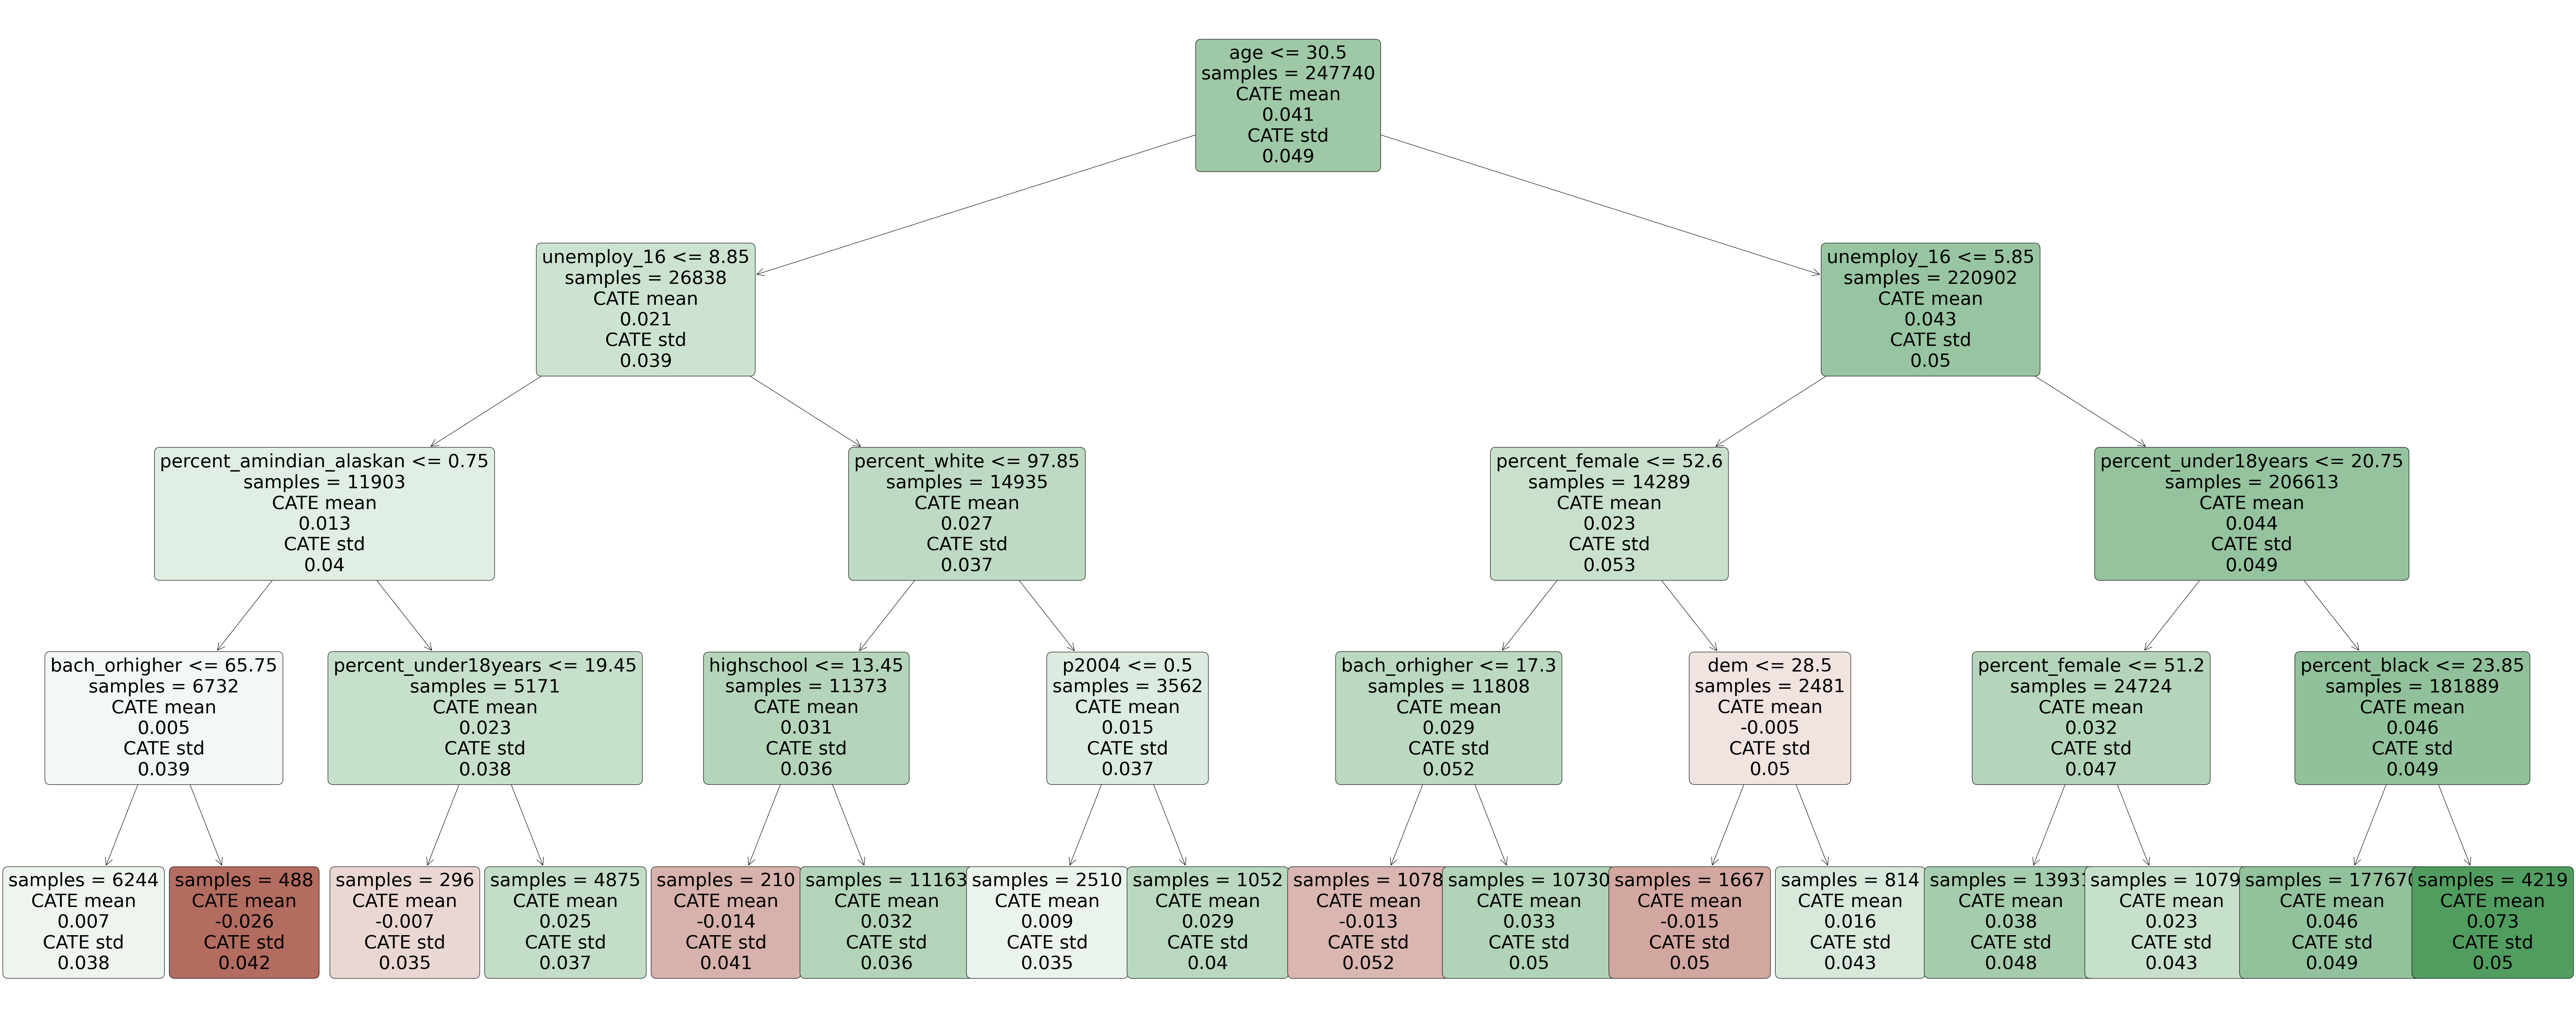

In [158]:
# plot interpreter
plt.figure(figsize=(100, 40))
interp.plot(feature_names=X_test.columns, filled=True, fontsize=40)
#plt.savefig('cf_cate_interp.png', dpi=500, format='png') # uncomment this to save the graph 
plt.show()

This graph provides with a collection of subgroups that differ in the extent to which social pressure affects their voting behaviour. 
> Leaf nodes that are more green have a higher conditional average treatment effect (CATE). Leaf nodes that are less green have a smaller but still positive CATE. Leaf nodes that are more red/brown have a negative CATE (i.e. individuals in these groups are less likely to vote when being socially pressured).

For example, individuals that are older than 30.5 and are in a ZIP code with an unemployment rate higher than 5.85%, with more than 20.75% of individuals being less than 18 years of age and with more than 23.85% of individuals being African-American are likely to increase their voting rates by 7.3% when socially pressured. 

We can check the level of granularity at which we want to define these subgroups by changing the `max_depth` parameter of our CATE interpreter. Importantly, as our subgroups get more fine-grained, our standard errors get smaller. Therefore, we can be more confident that our model is accurately identifying the treatment effect. 

## Section 3: Model Evaluation <a id="model_evaluation"></a>

We can now evaluate our model. The causal forest model does not support our normal model evaluation metrics like accuracy, precision, recall and F1. This is because our causal forest model is optimised to estimate treatment effects rather than maximising classification ability. Instead, we can use the inbuilt `.score()` method to calculate MSE fo the treatment effect predictions. This scoring method works by computing the mean predictions across different models that were cross-fitted during the model's training phase. It then calculates the MSE by comparing these predictions with the actual residuals between the observed outcomes and the predicted outcomes based on the observed treatments. Essentially, it evaluates how well the model's predicted treatment effects match the actual treatment effects observed in the new data.

In [128]:
# calculate MSE for the model 
mse_train = cf.score(y_train, T_train, X=X_train)
mse_test = cf.score(y_test, T_test, X=X_test)

In [129]:
# print train and test scores
print(f'Model train score: {mse_train}')
print(f'Model test score: {mse_test}')

Model train score: 0.09053348362215337
Model test score: 0.19490611796657065


We can see some evidence of slight model over-fitting here as our train MSE score is lower than our test MSE score. Therefore, one next step could be to do some model hyperparameter tuning. 

## Conclusions <a id="conclusions"></a>

To recap, this project is aimed at answering the question: **'How might we use machine learning to understand the role of social pressure in influencing voting behaviour?'.** We can decompose this question further into 3 sub-questions: 

1. **Does social pressure influence voting behaviour in terms of changing voting rates?**
2. **If so, by how much?**
3. **For whom, in particular?**

As explained in the introduction, our standard supervised ML models did not have satisfactory answers to any of these three sub-questions. However, by combining machine learning methods with causal inference, we are able to provide actionable insights that can guide policy-making and efforts to meaningfully change voting behaviour. 

### Key Insights

**Q1 and Q2. Does social pressure influence voting behaviour in terms of changing voting rates? If so, by how much?**

*A: On average, yes. Individuals that receive the treatment are 4.1% more likely to vote compared to those who do not, on average.* 

**Q3: For whom, in particular?**

*A: We have well-defined subgroups of individuals in our dataset. The factors that are most likely to drive differences between high responders and low responders are age, unemployment and racial/ethnic demographic factors.*

### Limitations and Next Steps

**Limitation 1: Large Standard Error for ATE**
The average treatment effect (ATE) derived from the model exhibits a large standard error. This uncertainty in the estimate suggests that the model's predictive power may not be robust across various samples from the population, which can lead to a lack of confidence in the generalizability of the treatment effect. 

**Next Step: Hyperparameter Tuning**
To address the issue of large standard errors, we can use a systematic approach to hyperparameter tuning. This includes using techniques such as cross-validation to find the optimal set of hyperparameters that minimize prediction error and the variance of the estimate. Grid search, random search, or Bayesian optimization methods can be used to explore the hyperparameter space efficiently. Performing hyperparameter tuning was, unfortunately, not possible in this notebook as tuning a causal forest model using the econML package involved some unique challenges like incompatibility with standard scoring metrics used in GridSearch and a large number of important hyperparameters. Due to computational and time constraints, addressing these challenges was out of the scope of this analysis. 

**Limitation 2: External Validity**
The current model's findings are based on data from a specific demographic (Michigan, 2008), using a primary election as context, and with treatments delivered via mail. This raises concerns about the external validity of the findings. It is uncertain whether the same effects would be observed in other contexts or populations, such as more diverse voter groups, different types of elections (e.g., general elections, local elections), or with modern communication methods for treatment delivery (e.g., social media, email).

**Next Step: Seek New Data Sources**
To enhance the external validity of the model, it is essential to test the findings across a broader set of conditions. This could involve seeking out or compiling new datasets that reflect a more diverse and current electorate and span various types of elections. Moreover, experimenting with different forms of treatment delivery that reflect modern communication channels can provide insights into the robustness of the treatment effects. Re-running the models with this new data can help to understand the consistency of the treatment effect across different scenarios and validate the original findings. 

### Data Collapsing

In [ ]:
#X_train_original = pd.read_csv('~Desktop/cap_data/social_X_train.csv')
#X_train = data_original.copy()
#X_train['treated'] = X_train[['treatment_civic duty', 'treatment_hawthorne', 'treatment_neighbors', 'treatment_self']].any(axis=1).astype(int)